# Analysis of "Google Play Store" dataset using Pandas

![googleplaystorepic](https://play.google.com/about/howplayworks/static/assets/social/share_google_play_logo.png)

In this project, we are going to analyze the Google Play Store dataset using Python. the Google Play Store data are collected form 4 years ago. For the dataset itself contains 10841 rows and 13 columns, which contain Application Name, Category, Rating, Price and other information about the Applications.

The Dataset originates from Kaggle.[Link to Kaggle dataset](https://www.kaggle.com/datasets/lava18/google-play-store-apps)

Link to the picture.[Link to the picture](https://play.google.com/about/howplayworks/static/assets/social/share_google_play_logo.png)

In this project, we are going to ask and answer 5 questions and make a conclusion by answering the questions.
> **5 Questions**
- What is the top 5 most installed category application & application in Google Play Store?  
- What is the top 5 application with the most reviews & rating in year 2018?
- What is the top 5 largest application memory size in 'Content Rating' category? `choose 3 from (content ranking)`
- What is the top 5 most reviewed and installed paid application?
- What is the correlation beetwen the price of application and the rating of application??

## 1. Data Preparation & Cleaning

### 1.1 Import Modules and Dataset for Analysis

**Import modules**

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

print(pd.__version__)
print(matplotlib.__version__)

1.4.2
3.5.1


**import Dataset**

In [2]:
gps = pd.read_csv('./Datasete the real/googleplaystore.csv')
gps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### 1.2 Cleaning Data

> Checking dataset columns

In [3]:
gps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

> Checking dataset info

In [4]:
gps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


> Checking duplicated values in dataset

In [5]:
gps[gps.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


> Remove duplicated values in dataset

In [6]:
gps.drop_duplicates(inplace = True)

In [7]:
gps.drop_duplicates(subset=['App'], inplace = True)

> Recheck if the duplicate values already removed

In [8]:
gps.duplicated().sum()

0

> Checking missing values

In [9]:
gps.isna().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

> Remove Nan values

In [10]:
gps.dropna(inplace = True)
gps.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

## 2. Answering Questions

> Review dataframe

In [11]:
gps.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


### 2.1 What is the top 5 most installed application category in Google Play Store?

> Remove `_`,`+`,`,` character from columns values & Convert installs datatype to numeric

In [12]:
gps['Category'] = gps['Category'].str.replace('_',' ')
gps['Installs'] = gps['Installs'].str.replace('+','')
gps['Installs'] = gps['Installs'].str.replace(',','')

gps['Installs'] = pd.to_numeric(gps['Installs'])

C:\Users\calvin\AppData\Local\Temp\ipykernel_2120\1986998766.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  gps['Installs'] = gps['Installs'].str.replace('+','')


In [13]:
gps['Installs'].dtype

dtype('int64')

> Top 5 most installed application Category

In [14]:
#gps_2 = gps.groupby('Category')['Installs'].sum().sort_values(ascending = False).head(5)
#gps_2
#gps_2.plot(kind = 'barh')

In [15]:
gps_1 = gps.groupby('Category')[['Category','Installs']].sum().sort_values(
    by='Installs',ascending = False).head(5)
gps_1

,Installs
Category,
GAME,13878762717
COMMUNICATION,11038241530
TOOLS,7999224500
PRODUCTIVITY,5793070180
SOCIAL,5487841475


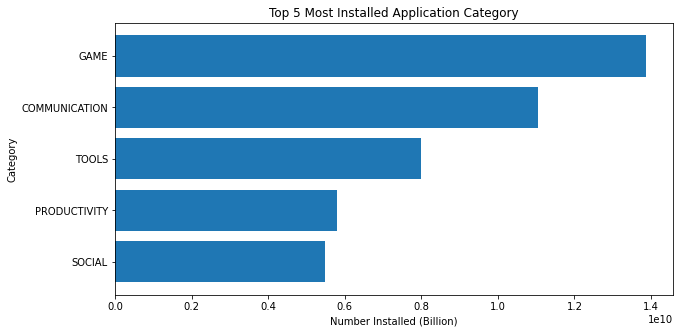

In [16]:
gps_1.sort_values('Installs', ascending  = True, inplace = True)

fiq,ax = plt.subplots(figsize=(10,5))
plt.barh(y=gps_1.index , width=gps_1['Installs'])

plt.title('Top 5 Most Installed Application Category')
plt.xlabel('Number Installed (Billion)')
plt.ylabel('Category');

> Top 5 most installed application

In [17]:
gps.sort_values('Installs',ascending = False)['App'].head(5).to_frame()

,App
3127,Google Street View
2554,Google+
3736,Google News
865,Google Play Games
3234,Google


### 2.2 What is the top 5 application with the most reviews & rating in year 2018?

> 
- Convert Reviews column to `Numeric`
- Convert Last Updated column to `datetime type` 
- Making new column `Year`



In [18]:
gps['Reviews'] = pd.to_numeric(gps['Reviews'])
gps['Last Updated'] = pd.to_datetime(gps['Last Updated'])
gps['Year'] = gps['Last Updated'].dt.year

In [19]:
gps.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART AND DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018
1,Coloring book moana,ART AND DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018


> Top 5 applications with the most review

In [20]:
gps[(gps['Year'] == 2018)].sort_values(
    by=['Reviews','Rating'],ascending = False
)[['App','Category','Reviews','Rating']].head(5)

,App,Category,Reviews,Rating
2544,Facebook,SOCIAL,78158306,4.1
336,WhatsApp Messenger,COMMUNICATION,69119316,4.4
2545,Instagram,SOCIAL,66577313,4.5
335,Messenger – Text and Video Chat for Free,COMMUNICATION,56642847,4.0
1670,Clash of Clans,GAME,44891723,4.6


### 2.3 What is the top 5 largest application size in 'Content Rating' category?

> Check content Rating unique values

In [21]:
gps['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

> converting column size to MB values, and string to `Nan`

In [22]:
gps['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [23]:
gps['Size'] = gps['Size'].str.replace('M','000')
gps['Size'] = gps['Size'].str.replace('K','')
gps['Size'] = gps['Size'].str.replace('k','')
gps['Size'] = gps['Size'].replace('Varies with device', None)
gps['Size'] = gps['Size'].astype('float')
gps['Size'] = gps['Size']/1000
gps.rename(columns = {'Size': 'Size MB'}, inplace = True)

In [24]:
gps.head(2)

,App,Category,Rating,Reviews,Size MB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART AND DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018
1,Coloring book moana,ART AND DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018


> Largest size application groupby Content Rating

In [25]:
gps[gps['Content Rating'] == 'Everyone'].sort_values(
    by= 'Size MB', ascending = False
)[['App','Category','Size MB','Content Rating']].head(5)

,App,Category,Size MB,Content Rating
1565,Talking Babsy Baby: Baby Games,LIFESTYLE,100.0,Everyone
8847,Draft Simulator for FUT 18,SPORTS,100.0,Everyone
1793,Mini Golf King - Multiplayer Game,GAME,100.0,Everyone
8409,Car Crash III Beam DH Real Damage Simulator 2018,GAME,100.0,Everyone
4690,Vi Trainer,HEALTH AND FITNESS,100.0,Everyone


In [26]:
gps[gps['Content Rating'] == 'Teen'].sort_values(
    by= 'Size MB', ascending = False
)[['App','Category','Size MB','Content Rating']].head(5)

,App,Category,Size MB,Content Rating
5530,The Walking Dead: Our World,GAME,100.0,Teen
1758,Hungry Shark Evolution,GAME,100.0,Teen
1927,Earn to Die 2,GAME,99.0,Teen
5641,Five Nights at Freddy's: SL,GAME,99.0,Teen
1825,Lineage 2: Revolution,GAME,99.0,Teen


In [27]:
gps[gps['Content Rating'] == 'Everyone 10+'].sort_values(
    by= 'Size MB', ascending = False
)[['App','Category','Size MB','Content Rating']].head(5)

,App,Category,Size MB,Content Rating
7404,SimCity BuildIt,FAMILY,100.0,Everyone 10+
9170,Stickman Legends: Shadow Wars,GAME,100.0,Everyone 10+
1863,Idle Heroes,GAME,99.0,Everyone 10+
9533,Exiled Kingdoms RPG,FAMILY,99.0,Everyone 10+
1789,Tank Stars,GAME,98.0,Everyone 10+


### 2.4 What is the top 5 most reviewed and installed paid application?

> Check the number of installed app on free and paid type

In [28]:
gps['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [29]:
gps.groupby('Type')['Installs'].sum()

Type
Free    75058208856
Paid       57300482
Name: Installs, dtype: int64

> top 5 reviewed and installed paid application 

In [30]:
gps[gps['Type']== 'Paid'].sort_values(by=['Reviews','Installs'], ascending = False).head(5)

,App,Category,Rating,Reviews,Size MB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year
2241,Minecraft,FAMILY,4.5,2376564,NaN,10000000,Paid,$6.99,Everyone 10+,Arcade;Action & Adventure,2018-07-24,1.5.2.1,Varies with device,2018
4034,Hitman Sniper,GAME,4.6,408292,29.0,10000000,Paid,$0.99,Mature 17+,Action,2018-07-12,1.7.110758,4.1 and up,2018
7417,Grand Theft Auto: San Andreas,GAME,4.4,348962,26.0,1000000,Paid,$6.99,Mature 17+,Action,2015-03-21,1.08,3.0 and up,2015
8860,Bloons TD 5,FAMILY,4.6,190086,94.0,1000000,Paid,$2.99,Everyone,Strategy,2018-07-13,3.16,2.3.3 and up,2018
9678,Where's My Water?,FAMILY,4.7,188740,69.0,1000000,Paid,$1.99,Everyone,Puzzle;Brain Games,2018-07-05,1.16.0,4.2 and up,2018


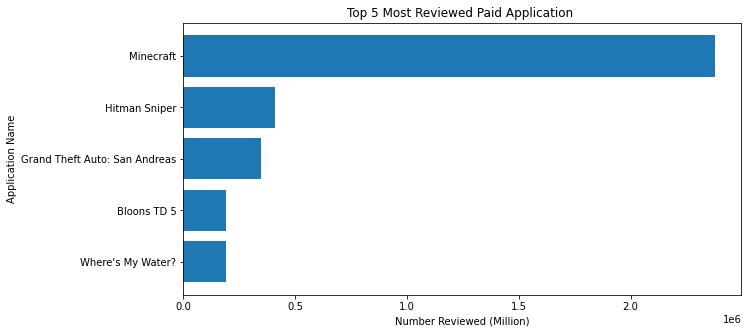

In [31]:
gps_paid = gps[gps['Type']== 'Paid'].sort_values(by=['Reviews','Installs'], ascending = False)[['App','Reviews']].head(5)

gps_paid.sort_values('Reviews', ascending  = True, inplace = True)

fiq,ax = plt.subplots(figsize=(10,5))
plt.barh(y=gps_paid['App'] , width=gps_paid['Reviews'])

plt.title('Top 5 Most Reviewed Paid Application ')
plt.xlabel('Number Reviewed (Million)')
plt.ylabel('Application Name');

### 2.5 What is the correlation beetwen the price of application and the rating of application?

> Convert `Price` Column to numeric and review dataframe

In [32]:
gps['Price'] = gps['Price'].str.replace('$','')
gps['Price'] = gps['Price'].astype('float')
gps.rename(columns = {'Price':'Price $'}, inplace = True)

C:\Users\calvin\AppData\Local\Temp\ipykernel_2120\185574160.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  gps['Price'] = gps['Price'].str.replace('$','')


In [33]:
gps['Price $'].dtype

dtype('float64')

In [34]:
gps[gps['Type'] == 'Paid'][['App','Rating','Price $']].sort_values(by='Price $',ascending =False)

,App,Rating,Price $
4367,I'm Rich - Trump Edition,3.6,400.00
5364,I am rich (Most expensive app),4.1,399.99
4197,most expensive app (H),4.3,399.99
5358,I am Rich!,3.8,399.99
5369,I am Rich,4.3,399.99
...,...,...,...
6936,Hitman GO,4.6,0.99
6985,Trinomial Factoring Wizard,4.0,0.99
9170,Stickman Legends: Shadow Wars,4.4,0.99
9165,League of Stickman 2018- Ninja Arena PVP(Dream...,4.4,0.99


> plot data to the scatter plot

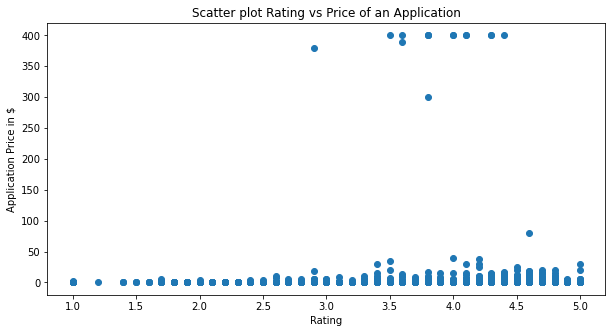

In [35]:
fig, ax = plt.subplots(figsize=(10,5))
plt.scatter( x = gps['Rating'], y = gps['Price $']);

plt.title('Scatter plot Rating vs Price of an Application')
plt.xlabel('Rating')
plt.ylabel('Application Price in $');

## 3.Conclusion

**Based on the questions we have answered we can conclude:**

> **1. What is the top 5 most installed category application & application in Google Play Store?**

    1.1 Top 5 most installed application category are :
    - GAME = 13,878,762,717 Download
    - COMMUNICATION = 11,038,241,530 Download
    - TOOLS = 7,999,224,500 Download
    - PRODUCTIVITY = 5,793,070,180 Download
    - SOCIAL = 5,487,841,475 Download
    
    1.2 Top 5 most installed application are :
    - Google Street View
    - Google+
    - Google News
    - Google Play Games
    - Google

> **2. What is the top 5 application with the most reviews & rating in year 2018?**

    - Facebook
    Reviews: 78158306 , Rating: 4.1
    
    - WhatsApp Messenger 
    Reviews: 69119316 , Rating: 4.4	
    
    - Instagram 
    Reviews: 66577313 , Rating: 4.5
    
    - Messenger – Text and Video Chat for Free 
    Reviews: 56642847 , Rating: 4.0	
    
    - Clash of Clans 
    Reviews: 44891723 , Rating: 4.6

> **3. What is the top 5 largest application memory size in 'Content Rating' category?**

    - Content Rating 'Everyone'
    * Talking Babsy Baby: Baby Games = 100.0 MB
    * Draft Simulator for FUT 18 = 100.0 MB
    * Mini Golf King - Multiplayer Game = 100.0 MB
    * Car Crash III Beam DH Real Damage Simulator 2018 = 100.0 MB
    * Vi Trainer = 100.0 MB
    
    - Content Rating 'Teen'
    * The Walking Dead: Our World	= 100.0 MB
    * Hungry Shark Evolution = 100.0 MB
    * Earn to Die 2 = 99.0 MB
    * Five Nights at Freddy's: SL	= 99.0 MB
    * Lineage 2: Revolution = 99.0 MB
    
    - Content Rating 'Everyone 10+'
    * SimCity BuildIt	= 100.0	MB
    * Stickman Legends: Shadow Wars = 100.0 MB
    * Idle Heroes	= 99.0 MB
    * Exiled Kingdoms RPG	= 99.0 MB
    * Tank Stars = 98.0 MB
    
The appllication memory size above 100 MB is written as 100MB+, so the memory size of this analysis can be more capped to 100MB maximum. If the dataset provides more information about the detailed memory size, the analysis can be more detailed.

> 4. What is the top 5 most reviewed and installed paid application?

    - Minecraft		
    Reviews = 2376564
    
    - Hitman Sniper	
    Reviews = 408292	
    
    - Grand Theft Auto: San Andreas
    Reviews = 348962	
    
    - Bloons TD 
    Reviews = 5190086
    
    - Where's My Water?	
    Reviews = 188740
> 5. What is the correlation beetwen the price of application and the rating of application?
    
    Based on the scatter plot we can see there is small trend when the Price of the app get more Expensive the Rating of application got higher also. 
    which can imply the higher the application price, the better the applications are


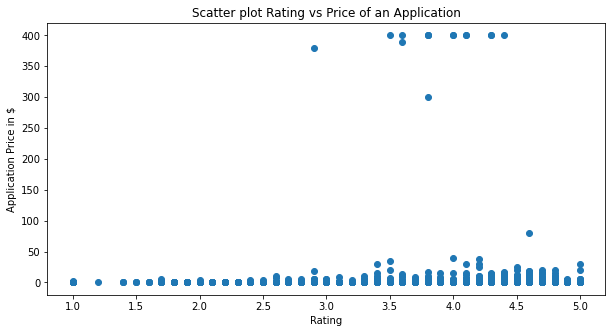

In [36]:
fig, ax = plt.subplots(figsize=(10,5))
plt.scatter( x = gps['Rating'], y = gps['Price $']);

plt.title('Scatter plot Rating vs Price of an Application')
plt.xlabel('Rating')
plt.ylabel('Application Price in $');

Thank You